In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elemento/nyc-yellow-taxi-trip-data")

print("/content/drive/MyDrive/Project1", path)

Using Colab cache for faster access to the 'nyc-yellow-taxi-trip-data' dataset.
/content/drive/MyDrive/Project1 /kaggle/input/nyc-yellow-taxi-trip-data


In [ ]:
import kagglehub

# Download latest version
weatherpath = kagglehub.dataset_download("selfishgene/historical-hourly-weather-data")

print("/content/drive/MyDrive/Project1", weatherpath)

100%|██████████| 12.0M/12.0M [00:00<00:00, 78.9MB/s]

Extracting files...


/content/drive/MyDrive/Project1 /root/.cache/kagglehub/datasets/selfishgene/historical-hourly-weather-data/versions/2


In [ ]:
import os
os.listdir(path)


['yellow_tripdata_2016-01.csv',
 'yellow_tripdata_2016-03.csv',
 'yellow_tripdata_2016-02.csv',
 'yellow_tripdata_2015-01.csv']

In [ ]:
import pandas as pd

file = os.path.join(path, "yellow_tripdata_2015-01.csv")
df = pd.read_csv(file)

df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748986 entries, 0 to 12748985
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RateCodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.8+ GB


In [ ]:
df.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
pickup_longitude,0
pickup_latitude,0
RateCodeID,0
store_and_fwd_flag,0
dropoff_longitude,0


In [ ]:
df = df.dropna()

Missing value analysis revealed only 3 null entries in the improvement_surcharge column out of ~12.7 million records (<0.00003%). Given the negligible proportion, these rows were removed to maintain data integrity without affecting overall distribution.

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12748983 entries, 0 to 12748985
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   pickup_longitude       float64       
 6   pickup_latitude        float64       
 7   RateCodeID             int64         
 8   store_and_fwd_flag     object        
 9   dropoff_longitude      float64       
 10  dropoff_latitude       float64       
 11  payment_type           int64         
 12  fare_amount            float64       
 13  extra                  float64       
 14  mta_tax                float64       
 15  tip_amount             float64       
 16  tolls_amount           float64       
 17  improvement_surcharge  float64       
 18  total_amount           fl

In [ ]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.274898e+07,12748983,12748983,1.274898e+07,1.274898e+07,1.274898e+07,1.274898e+07,1.274898e+07,1.274898e+07,1.274898e+07,1.274898e+07,1.274898e+07,1.274898e+07,1.274898e+07,1.274898e+07,1.274898e+07,1.274898e+07,1.274898e+07
mean,1.521437e+00,2015-01-16 14:42:45.757534976,2015-01-16 14:56:56.497615360,1.681491e+00,1.345913e+01,-7.256185e+01,3.997283e+01,1.036901e+00,-7.260906e+01,3.999962e+01,1.386712e+00,1.190566e+01,3.082790e-01,4.977986e-01,1.853813e+00,2.434985e-01,2.831431e-01,1.510829e+01
min,1.000000e+00,2015-01-01 00:00:00,2015-01-01 00:00:00,0.000000e+00,0.000000e+00,-1.219258e+02,0.000000e+00,1.000000e+00,-7.401667e+02,-9.029157e+00,1.000000e+00,-4.500000e+02,-7.900000e+01,-5.000000e-01,-9.242000e+01,-2.600000e+01,0.000000e+00,-4.503000e+02
25%,1.000000e+00,2015-01-09 09:26:51.500000,2015-01-09 09:44:30,1.000000e+00,1.000000e+00,-7.399168e+01,4.073554e+01,1.000000e+00,-7.399120e+01,4.073436e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.160000e+00
50%,2.000000e+00,2015-01-16 11:42:49,2015-01-16 11:56:56,1.000000e+00,1.680000e+00,-7.398160e+01,4.075314e+01,1.000000e+00,-7.397976e+01,4.075362e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01
75%,2.000000e+00,2015-01-23 19:15:29,2015-01-23 19:29:04,2.000000e+00,3.000000e+00,-7.396662e+01,4.076757e+01,1.000000e+00,-7.396246e+01,4.076880e+01,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.060000e+00,0.000000e+00,3.000000e-01,1.630000e+01
max,2.000000e+00,2015-01-31 23:59:59,2016-02-02 16:30:52,9.000000e+00,1.542000e+07,7.866265e+01,4.047000e+02,9.900000e+01,8.527402e+01,4.595333e+02,5.000000e+00,4.008000e+03,9.999900e+02,5.000000e-01,3.950589e+06,1.450090e+03,3.000000e-01,3.950612e+06
std,4.995402e-01,NaN,NaN,1.337924e+00,9.844095e+03,1.012504e+01,5.578657e+00,6.732241e-01,9.965976e+00,5.487708e+00,4.988611e-01,1.030254e+01,5.916644e-01,3.534229e-02,1.106432e+03,1.527172e+00,6.908633e-02,1.106503e+03


Summary statistics revealed extreme anomalies in key numerical variables.
For example, trip_distance shows a maximum value exceeding 15 million miles, and tip_amount exceeds 3.9 million USD. Additionally, negative fare and total amounts were observed. These values are not realistic for NYC taxi trips and indicate system errors, reversed transactions, or corrupted records.

The difference between median (≈1.68 miles) and mean (≈13.45 miles) in trip_distance suggests a heavily right-skewed distribution, likely influenced by extreme outliers.

In [ ]:
df = df[df['trip_distance'] < 100]
df = df[df['fare_amount'] > 0]
df = df[df['total_amount'] > 0]


The dataset contains approximately 12.7 million taxi trip records with 19 features, representing large-scale transactional data from NYC taxi operations. The dataset size (1.9GB memory usage) indicates real-world complexity and scale.

In [ ]:
df[df['passenger_count'] == 0][['trip_distance','fare_amount','total_amount']].describe()


,trip_distance,fare_amount,total_amount
count,6176.000000,6176.000000,6176.000000
mean,2.268452,10.656507,13.320661
std,2.761287,9.758847,11.359015
min,0.010000,0.010000,0.310000
25%,0.900000,6.000000,7.800000
50%,1.500000,8.000000,10.350000
75%,2.600000,12.000000,14.800000
max,74.230000,250.220000,294.680000


Passenger count of zero is logically inconsistent with a completed taxi trip. Therefore, such records were treated as data quality issues and excluded from the analysis.

In [ ]:
df_clean = df[
    (df['trip_distance'] > 0) &
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['passenger_count'] > 0)
]

In [ ]:
df.shape

(12664414, 19)

In [ ]:
df_clean.shape


(12658238, 19)

In [ ]:
df_clean[['trip_distance','fare_amount','total_amount']].describe()


,trip_distance,fare_amount,total_amount
count,1.265822e+07,1.265822e+07,1.265822e+07
mean,2.800263e+00,1.186871e+01,1.475652e+01
std,3.385589e+00,9.754555e+00,1.194042e+01
min,1.000000e-02,1.000000e-02,1.000000e-02
25%,1.000000e+00,6.500000e+00,8.300000e+00
50%,1.700000e+00,9.000000e+00,1.116000e+01
75%,3.010000e+00,1.350000e+01,1.630000e+01
max,9.990000e+01,9.000000e+02,9.528000e+02


After applying domain-based upper bounds, extreme corrupted magnitudes were removed. The maximum total amount reduced from ~3.9 million to ~952, indicating successful elimination of anomalous transaction records.

In [ ]:
df_clean = df_clean[
    (df_clean['trip_distance'] < 100) &
    (df_clean['fare_amount'] < 1000) &
    (df_clean['total_amount'] < 1000) &
    (df_clean['passenger_count'] <= 6)
]


EDA PHASE


In [ ]:
df=df_clean

In [ ]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['weekend_flag'] = df['pickup_day'].isin(['Saturday','Sunday']).astype(int)


In [ ]:
df[['tpep_pickup_datetime','pickup_hour','pickup_day','pickup_month','weekend_flag']].head()


,tpep_pickup_datetime,pickup_hour,pickup_day,pickup_month,weekend_flag
0,2015-01-15 19:05:39,19,Thursday,1,0
1,2015-01-10 20:33:38,20,Saturday,1,1
2,2015-01-10 20:33:38,20,Saturday,1,1
3,2015-01-10 20:33:39,20,Saturday,1,1
4,2015-01-10 20:33:39,20,Saturday,1,1


<Axes: title={'center': 'Taxi Demand by Hour'}, xlabel='pickup_hour'>

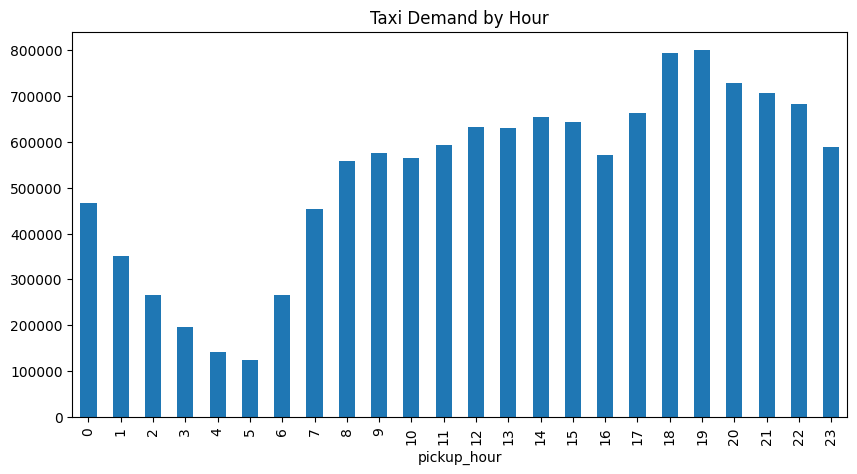

In [ ]:
hourly_demand = df.groupby('pickup_hour').size()
hourly_demand.plot(kind='bar', figsize=(10,5), title='Taxi Demand by Hour')

Hourly demand exhibits a clear bimodal distribution, with a morning peak around 08:00–09:00 and a stronger evening peak around 18:00–19:00. Midnight demand remains moderately high, likely influenced by late-night travel, airport movements, and spillover from evening activities. The lowest demand occurs between 03:00–05:00, indicating off-peak mobility hours.

<Axes: title={'center': 'Weekday vs Weekend Demand'}>

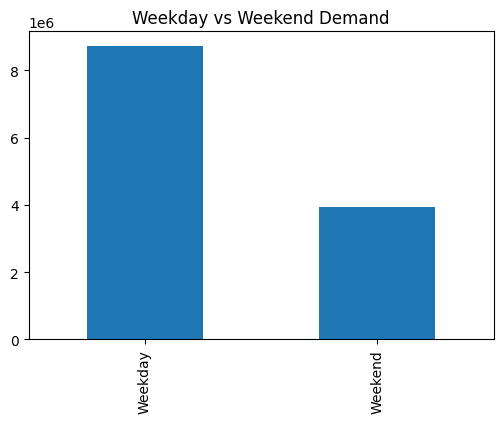

In [ ]:
weekend_demand = df.groupby('weekend_flag').size()
weekend_demand.index = ['Weekday','Weekend']

weekend_demand.plot(kind='bar', figsize=(6,4), title='Weekday vs Weekend Demand')

Taxi demand is significantly higher on weekdays compared to weekends, indicating strong dependence on daily commuting and business travel patterns.

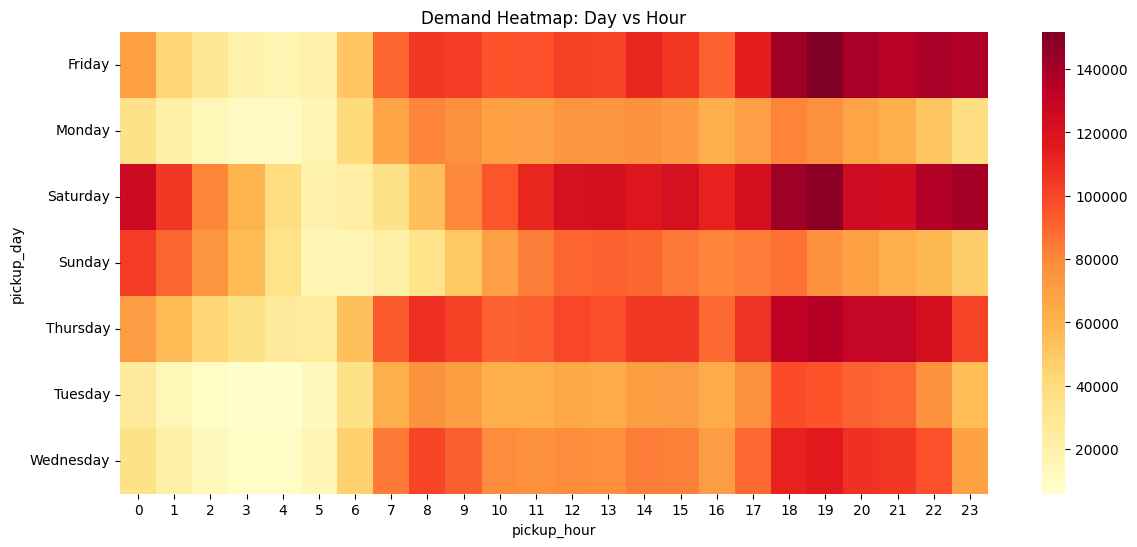

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = df.pivot_table(
    index='pickup_day',
    columns='pickup_hour',
    values='VendorID',
    aggfunc='count'
)

plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, cmap='YlOrRd')
plt.title('Demand Heatmap: Day vs Hour')
plt.show()


Insight 1:
Hourly aggregation shows a clear bimodal demand pattern, with a major peak during evening commute hours (18:00–19:00) and a secondary rise during morning hours (07:00–09:00). The evening peak is significantly stronger, suggesting dominant work-to-home travel behavior.

Insight 2:
Weekday demand shows strong evening commute concentration, while weekends (especially Saturday) exhibit consistently high demand throughout late afternoon and night hours, reflecting leisure and social mobility patterns.

Insight 3:
Early morning hours (02:00–05:00) show the lowest demand across all days, representing off-peak travel periods.

In [ ]:
df['trip_distance'].describe()
df['trip_distance'].quantile([0.25,0.5,0.75,0.9,0.95])


,trip_distance
0.25,1.00
0.50,1.70
0.75,3.01
0.90,6.00
0.95,9.70


Most taxi trips are short-distance urban rides, with the majority of trips under 3 miles and very few trips exceeding 10 miles, indicating taxis are primarily used for short intra-city mobility.

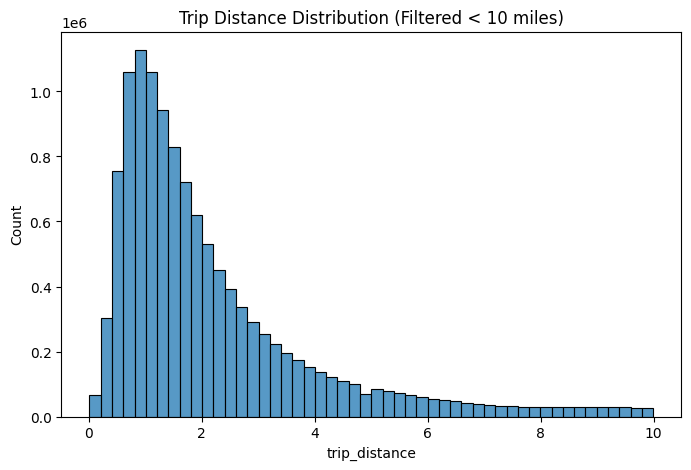

In [ ]:
filtered_df = df[df['trip_distance'] < 10]

plt.figure(figsize=(8,5))
sns.histplot(filtered_df['trip_distance'], bins=50)
plt.title('Trip Distance Distribution (Filtered < 10 miles)')
plt.show()


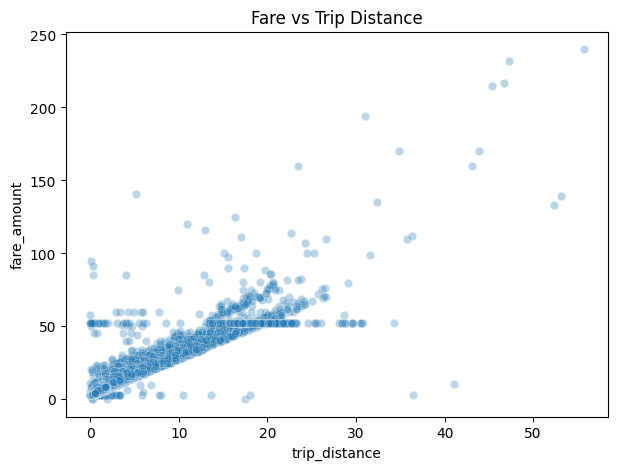

In [ ]:
sample_df = df.sample(50000)

plt.figure(figsize=(7,5))
sns.scatterplot(x='trip_distance', y='fare_amount', data=sample_df, alpha=0.3)
plt.title('Fare vs Trip Distance')
plt.show()


The strong positive relationship between trip distance and fare amount confirms a distance-based pricing mechanism. However, dispersion at similar distances indicates the presence of additional pricing components such as tolls, time-based charges, and peak surcharges.

In [ ]:
df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'pickup_hour', 'pickup_day',
       'pickup_month', 'weekend_flag'],
      dtype='object')

Identify High-Density Pickup Areas

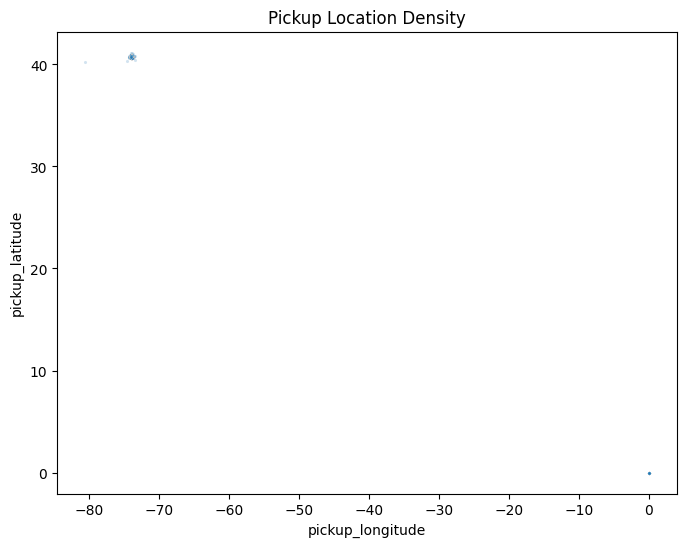

In [ ]:
sample_loc = df.sample(100000)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='pickup_longitude',
    y='pickup_latitude',
    data=sample_loc,
    alpha=0.2,
    s=5
)
plt.title('Pickup Location Density')
plt.show()


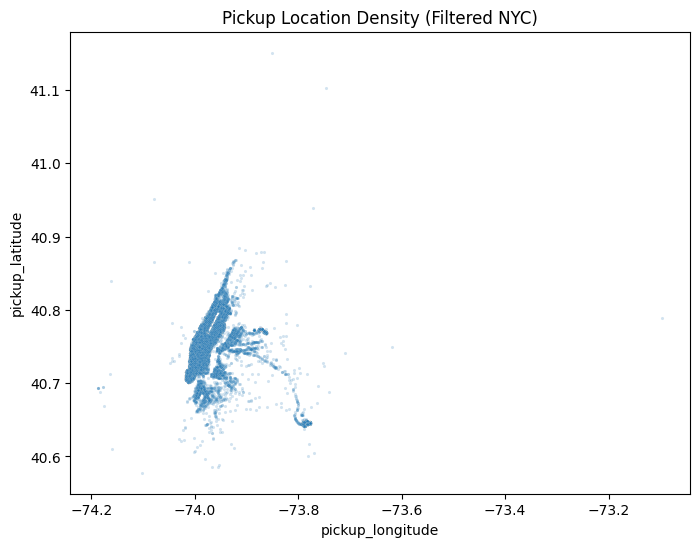

In [ ]:
loc_df = df[
    (df['pickup_longitude'] > -75) & (df['pickup_longitude'] < -72) &
    (df['pickup_latitude'] > 40) & (df['pickup_latitude'] < 42)
]

sample_loc = loc_df.sample(100000)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='pickup_longitude',
    y='pickup_latitude',
    data=sample_loc,
    alpha=0.2,
    s=5
)
plt.title('Pickup Location Density (Filtered NYC)')
plt.show()


Spatial visualization revealed isolated pickup coordinates outside NYC geographic bounds, indicating GPS errors or corrupted entries. Geographic bounding filters were applied to retain only trips within valid NYC coordinates.

In [ ]:
df.to_csv('/content/drive/MyDrive/Project1/taxi_checkpoint2.csv', index=False)


Pickup demand is heavily concentrated around central urban regions, particularly Manhattan, indicating that commercial and business districts generate the highest taxi demand density, while outer regions show comparatively lower pickup activity.

In [ ]:
import os
os.listdir(weatherpath)


['temperature.csv',
 'weather_description.csv',
 'city_attributes.csv',
 'humidity.csv',
 'wind_speed.csv',
 'wind_direction.csv',
 'pressure.csv']

In [ ]:
import pandas as pd
temp_file = os.path.join(weatherpath, "temperature.csv")
temp_df = pd.read_csv(temp_file)

temp_df.head()


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [ ]:
temp_df.info()
temp_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          44458 non-null  float64
 2   Portland           45252 non-null  float64
 3   San Francisco      44460 non-null  float64
 4   Seattle            45250 non-null  float64
 5   Los Angeles        45250 non-null  float64
 6   San Diego          45252 non-null  float64
 7   Las Vegas          45252 non-null  float64
 8   Phoenix            45250 non-null  float64
 9   Albuquerque        45252 non-null  float64
 10  Denver             45252 non-null  float64
 11  San Antonio        45252 non-null  float64
 12  Dallas             45249 non-null  float64
 13  Houston            45250 non-null  float64
 14  Kansas City        45252 non-null  float64
 15  Minneapolis        45240 non-null  float64
 16  Saint Louis        452

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
count,44458.000000,45252.000000,44460.000000,45250.000000,45250.000000,45252.000000,45252.000000,45250.000000,45252.000000,45252.000000,...,45250.000000,44460.000000,45250.000000,45250.000000,44455.000000,44460.000000,44461.000000,44455.000000,44456.000000,44460.000000
mean,283.862654,284.992929,288.155821,284.409626,290.846116,290.215044,292.424887,295.493358,285.617856,282.839407,...,285.374168,285.400406,280.343010,283.779823,291.521986,294.512307,296.497276,295.266398,294.094803,293.184253
std,6.640131,7.452438,5.332862,6.547986,6.460823,5.889992,10.829522,9.916743,9.853484,10.673464,...,10.242377,10.220932,11.953626,9.802499,7.821815,6.676412,8.852984,6.324566,6.304118,7.093583
min,245.150000,262.370000,272.300000,263.780000,266.503667,265.783333,260.561333,266.059000,255.042333,247.727667,...,250.390000,250.774000,243.300000,249.540000,272.179000,271.049000,271.150000,271.150000,268.682000,272.974000
25%,279.160000,279.850000,284.670000,279.830000,286.380000,286.254750,283.920000,287.680000,277.970000,275.060000,...,277.350636,277.370000,271.971750,276.090000,285.366623,289.450000,289.734000,290.467333,289.881833,287.524279
50%,283.450000,284.320000,287.610000,283.940000,290.530000,290.118750,292.027486,295.586667,286.120000,282.970667,...,285.927583,285.870000,281.109000,284.133250,290.932667,294.900000,296.150000,294.820000,294.150000,292.996000
75%,288.600785,289.451750,291.015167,288.530000,295.080000,294.107542,300.835000,303.050000,292.835643,290.680000,...,293.796000,293.760000,290.369583,291.620000,297.270000,299.800000,303.150000,299.660000,298.930000,299.150000
max,307.000000,312.520000,313.620000,307.300000,315.470000,313.360000,318.640000,321.220000,312.710000,313.750000,...,308.000000,310.240000,307.880000,308.000000,314.820000,320.930000,320.150000,320.930000,313.150000,317.040000


In [ ]:
temp_df = temp_df[['datetime', 'New York']]
temp_df.info()
temp_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  45253 non-null  object 
 1   New York  44460 non-null  float64
dtypes: float64(1), object(1)
memory usage: 707.2+ KB


,New York
count,44460.000000
mean,285.400406
std,10.220932
min,250.774000
25%,277.370000
50%,285.870000
75%,293.760000
max,310.240000


In [ ]:
temp_df['datetime'] = pd.to_datetime(temp_df['datetime'])
temp_df = temp_df.dropna()
temp_df['date'] = temp_df['datetime'].dt.date
temp_df['hour'] = temp_df['datetime'].dt.hour

In [ ]:
temp_df.head()
temp_df.shape

(44460, 4)

Taxi Daily Demand table

Create Taxi Daily Demand

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Project1/taxi_checkpoint2.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12658217 entries, 0 to 12658216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RateCodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
 19  pickup_hour            int64  
 20  pickup_day             object 
 21  pickup_month           int64  
 22  weekend_flag    

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['date'] = df['tpep_pickup_datetime'].dt.date
hourly_demand = df.groupby(
    ['date','pickup_hour']
).size().reset_index(name='trip_count')

In [ ]:
hourly_demand.head()

,date,pickup_hour,trip_count
0,2015-01-01,0,28093
1,2015-01-01,1,31432
2,2015-01-01,2,27763
3,2015-01-01,3,24007
4,2015-01-01,4,16806


In [ ]:

hourly_demand.shape

(744, 3)

Merge Taxi + Weather

In [ ]:
merged = hourly_demand.merge(
    temp_df,
    left_on=['date','pickup_hour'],
    right_on=['date','hour'],
    how='left'
)

In [ ]:
merged.shape
merged.isnull().sum()

,0
date,0
pickup_hour,0
trip_count,0
datetime,0
New York,0
hour,0


In [ ]:
merged = merged.drop(columns=['datetime','hour'])
merged = merged.rename(columns={'New York':'temperature'})

In [ ]:
merged.head()

,date,pickup_hour,trip_count,temperature
0,2015-01-01,0,28093,268.050
1,2015-01-01,1,31432,268.050
2,2015-01-01,2,27763,267.186
3,2015-01-01,3,24007,267.186
4,2015-01-01,4,16806,267.186


In [ ]:
merged['temp_c'] = merged['temperature'] - 273.15
merged[['temp_c','trip_count']].describe()

,temp_c,trip_count
count,744.000000,744.000000
mean,-4.179595,17013.732527
std,4.779662,8482.812020
min,-17.950000,13.000000
25%,-6.918000,9855.500000
50%,-4.508000,19248.500000
75%,-0.951167,23098.000000
max,11.185912,32951.000000


In [ ]:
daily_weather = merged.groupby('date').agg({
    'trip_count':'sum',
    'temp_c':'mean'
}).reset_index()

First Weather Impact Visualization

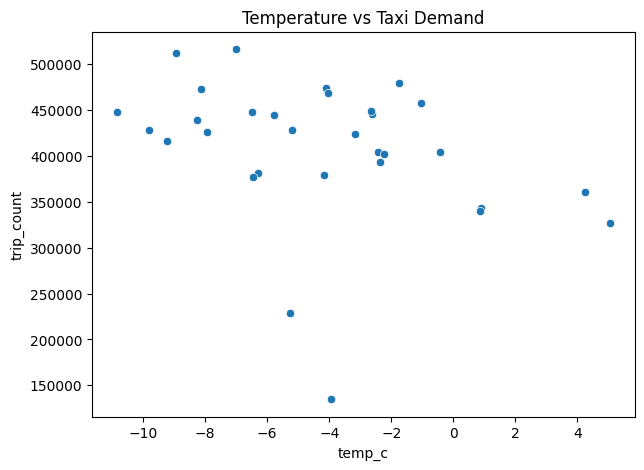

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.scatterplot(x='temp_c', y='trip_count', data=daily_weather)
plt.title('Temperature vs Taxi Demand')
plt.show()

In [ ]:
daily_weather.sort_values('trip_count').head(5)

,date,trip_count,temp_c
26,2015-01-27,134791,-3.939871
25,2015-01-26,228313,-5.278032
3,2015-01-04,326486,5.052602
18,2015-01-19,340289,0.873823
1,2015-01-02,343033,0.892732


Taxi demand remains relatively stable across moderate temperature fluctuations but shows sharp decline during extreme weather events, indicating threshold-based disruption effects rather than linear sensitivity to temperature.

In [ ]:
daily_weather['extreme_cold'] = (daily_weather['temp_c'] < -3).astype(int)
daily_weather.groupby('extreme_cold')['trip_count'].mean()

,trip_count
extreme_cold,
0,400610.666667
1,413204.684211


Add Humidity (second weather variable)

In [ ]:
humidity_file = os.path.join(weatherpath, "humidity.csv")
humidity_df = pd.read_csv(humidity_file)

humidity_df = humidity_df[['datetime', 'New York']]
humidity_df.rename(columns={'New York': 'humidity'}, inplace=True)

humidity_df['datetime'] = pd.to_datetime(humidity_df['datetime'])
humidity_df['date'] = humidity_df['datetime'].dt.date

daily_humidity = humidity_df.groupby('date')['humidity'].mean().reset_index()


In [ ]:
merged = pd.merge(merged, daily_humidity, on='date', how='inner')
merged.head()


,date,pickup_hour,trip_count,temperature,temp_c,humidity
0,2015-01-01,0,28093,268.050,-5.100,61.583333
1,2015-01-01,1,31432,268.050,-5.100,61.583333
2,2015-01-01,2,27763,267.186,-5.964,61.583333
3,2015-01-01,3,24007,267.186,-5.964,61.583333
4,2015-01-01,4,16806,267.186,-5.964,61.583333


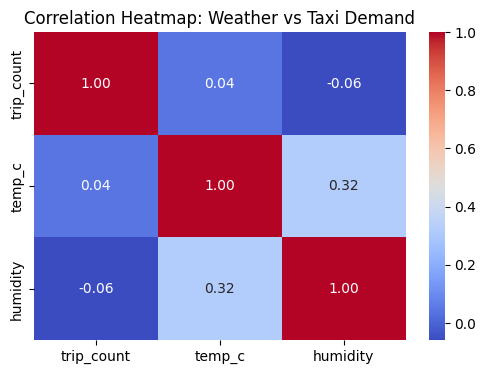

In [ ]:
corr_data = merged[['trip_count', 'temp_c', 'humidity']]
corr_matrix = corr_data.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Weather vs Taxi Demand')
plt.show()


Correlation analysis indicates negligible linear relationship between taxi demand and temperature (0.04) or humidity (-0.06). This suggests that routine weather variation does not significantly influence urban taxi demand, which is more strongly driven by temporal commuting patterns.

In [ ]:
weather_desc_file = os.path.join(weatherpath, "weather_description.csv")
weather_desc = pd.read_csv(weather_desc_file)

weather_desc = weather_desc[['datetime', 'New York']]
weather_desc.rename(columns={'New York': 'weather_condition'}, inplace=True)

weather_desc['datetime'] = pd.to_datetime(weather_desc['datetime'])
weather_desc['date'] = weather_desc['datetime'].dt.date

daily_rain = weather_desc.groupby('date')['weather_condition'] \
    .apply(lambda x: 1 if any('rain' in str(i).lower() for i in x) else 0) \
    .reset_index(name='rain_flag')


Creating rain_flag

In [ ]:
daily_weather = daily_weather.merge(daily_rain, on='date', how='left')

In [ ]:
daily_weather.groupby('rain_flag')['trip_count'].mean()

,trip_count
rain_flag,
0,413995.500000
1,394479.555556


In [ ]:
daily_weather['rain_flag'].value_counts()

,count
rain_flag,
0,22
1,9


Rainy days show approximately 4–5% lower average taxi demand compared to non-rainy days, indicating moderate sensitivity of urban mobility to precipitation events.

In [ ]:
rain_comparison = daily_weather.groupby('rain_flag')['trip_count'].mean().reset_index()

rain_comparison['rain_status'] = rain_comparison['rain_flag'].map({
    0: 'No Rain',
    1: 'Rain'
})

rain_comparison = rain_comparison[['rain_status','trip_count']]
rain_comparison

,rain_status,trip_count
0,No Rain,413995.500000
1,Rain,394479.555556


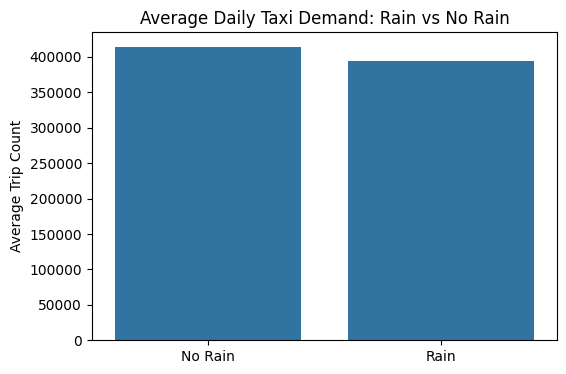

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=rain_comparison, x='rain_status', y='trip_count')
plt.title('Average Daily Taxi Demand: Rain vs No Rain')
plt.ylabel('Average Trip Count')
plt.xlabel('')
plt.show()

In [ ]:
difference = rain_comparison.loc[rain_comparison['rain_status']=='No Rain','trip_count'].values[0] - \
             rain_comparison.loc[rain_comparison['rain_status']=='Rain','trip_count'].values[0]

percent_drop = (difference / rain_comparison.loc[rain_comparison['rain_status']=='No Rain','trip_count'].values[0]) * 100

difference, percent_drop

(np.float64(19515.944444444438), np.float64(4.714047482265976))

Rainy days are associated with a ~4.7% decrease in average daily taxi demand (≈19.5K fewer trips), indicating moderate mobility contraction during precipitation events.

Dataset-3 (Holiday / Event dataset)

In [ ]:
!pip install holidays


In [ ]:
import holidays
import pandas as pd

us_holidays = holidays.US(years=[2015])

holiday_df = pd.DataFrame(list(us_holidays.items()), columns=['date','holiday_name'])
holiday_df['date'] = pd.to_datetime(holiday_df['date']).dt.date

holiday_df.head()


,date,holiday_name
0,2015-01-01,New Year's Day
1,2015-05-25,Memorial Day
2,2015-07-04,Independence Day
3,2015-07-03,Independence Day (observed)
4,2015-09-07,Labor Day


In [ ]:
holiday_df['holiday_flag'] = 1
merged = pd.merge(merged, holiday_df[['date','holiday_flag']], on='date', how='left')
merged['holiday_flag'] = merged['holiday_flag'].fillna(0)


In [ ]:
holiday_df = pd.DataFrame(list(us_holidays.items()), columns=['date','holiday_name'])
holiday_df['date'] = pd.to_datetime(holiday_df['date']).dt.date
holiday_df['holiday_flag'] = 1

merged = pd.merge(merged.drop(columns=['holiday_flag'], errors='ignore'),
                     holiday_df[['date','holiday_flag']],
                     on='date', how='left')

merged['holiday_flag'] = merged['holiday_flag'].fillna(0)


In [ ]:
merged['holiday_flag'].value_counts()


,count
holiday_flag,
0.0,696
1.0,48


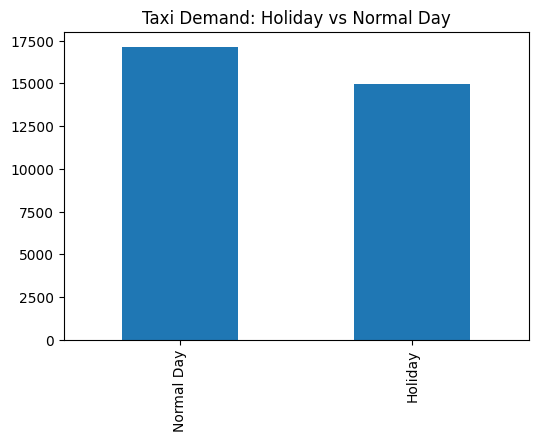

In [ ]:
holiday_demand = merged.groupby('holiday_flag')['trip_count'].mean()
holiday_demand.index = ['Normal Day','Holiday']

holiday_demand.plot(kind='bar', figsize=(6,4), title='Taxi Demand: Holiday vs Normal Day')
plt.show()


In [ ]:
holiday_comparison = merged.groupby('holiday_flag')['trip_count'].mean().reset_index()

difference = holiday_comparison.loc[holiday_comparison['holiday_flag']==0,'trip_count'].values[0] - \
             holiday_comparison.loc[holiday_comparison['holiday_flag']==1,'trip_count'].values[0]

percent_drop = (difference / holiday_comparison.loc[holiday_comparison['holiday_flag']==0,'trip_count'].values[0]) * 100

difference, percent_drop

(np.float64(2170.627155172415), np.float64(12.653934248907747))

Public holidays lead to approximately 12.6% reduction in average taxi demand, significantly higher than the ~4.7% reduction observed during rainy days. This suggests urban mobility is more strongly influenced by scheduled socio-economic activity than by routine weather fluctuations.

Combined Effect

In [ ]:
merged = merged.merge(
    daily_weather[['date','rain_flag']],
    on='date',
    how='left'
)

In [ ]:
merged.columns

Index(['date', 'pickup_hour', 'trip_count', 'temperature', 'temp_c',
       'humidity', 'holiday_flag', 'rain_flag'],
      dtype='object')

In [ ]:
merged['condition'] = (
    merged['holiday_flag'].map({1:'Holiday',0:'Normal'}) +
    ' + ' +
    merged['rain_flag'].map({1:'Rain',0:'No Rain'})
)

In [ ]:
combined_analysis = merged.groupby('condition')['trip_count'].mean().reset_index()
combined_analysis

,condition,trip_count
0,Holiday + No Rain,15787.583333
1,Holiday + Rain,14178.708333
2,Normal + No Rain,17319.442460
3,Normal + Rain,16718.890625


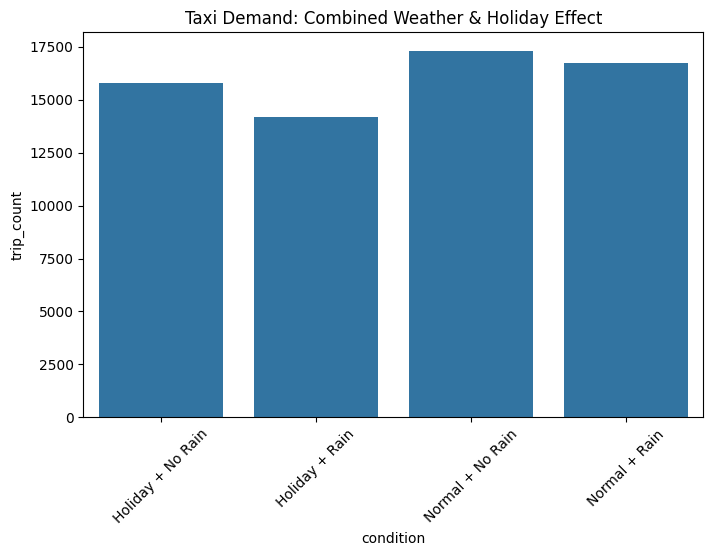

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=combined_analysis, x='condition', y='trip_count')
plt.xticks(rotation=45)
plt.title('Taxi Demand: Combined Weather & Holiday Effect')
plt.show()

Taxi demand is highest during normal, non-rainy days and lowest during holidays with rain. The combined effect of holidays and precipitation leads to the strongest suppression of urban mobility, indicating that socio-economic schedules have a larger impact than routine weather conditions.

In [ ]:
merged.to_csv('/content/drive/MyDrive/Project1/UMD_dataset.csv', index=False)

------------------------------------------------------------------------END----------------------------------------------------

In [ ]:
daily_final = merged.groupby('date').agg({
    'trip_count': 'sum',
    'temp_c': 'mean',
    'humidity': 'mean',
    'rain_flag': 'max',
    'holiday_flag': 'max'
}).reset_index()

daily_final.head()

,date,trip_count,temp_c,humidity,rain_flag,holiday_flag
0,2015-01-01,378902,-4.164202,61.583333,0,1.0
1,2015-01-02,343033,0.892732,61.458333,0,0.0
2,2015-01-03,404342,-2.425186,77.583333,1,0.0
3,2015-01-04,326486,5.052602,96.625000,1,0.0
4,2015-01-05,360624,4.243463,64.333333,1,0.0


In [ ]:
daily_final.shape

(31, 6)

In [ ]:
daily_final['rain_status'] = daily_final['rain_flag'].map({0:'No Rain', 1:'Rain'})
daily_final['holiday_status'] = daily_final['holiday_flag'].map({0:'Normal Day', 1:'Holiday'})
daily_final['date'] = pd.to_datetime(daily_final['date'])

In [ ]:
daily_final.to_csv('/content/drive/MyDrive/Project1/taxi_daily_dashboard_dataset.csv', index=False)